In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils import data
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

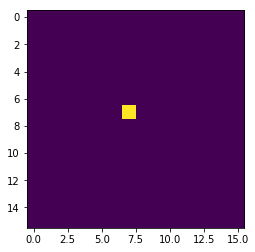

In [2]:
#plot array as an image
def imshow(npimg):
    plt.imshow(npimg)
    plt.show()
# create an array(16X16) of zeros and set a random coordinate (i,j) to 1
def create_fake_dataset(imgsz):
    imgs = np.zeros((numimgs, imgsz, imgsz))
    coordinates = np.zeros((numimgs, 2))
    for i in range(numimgs):
        rand_coord = np.ravel((np.random.randint(15, size=(1, 2))).tolist())
        imgs[i, rand_coord[0], rand_coord[1]] = 1
        coordinates[i] = rand_coord
    imshow(imgs[19]) #display random image
    return imgs, coordinates

numimgs = 10000
imgs, coordinates = create_fake_dataset(16)


In [3]:
# Reshape to vector
X = (imgs.reshape(numimgs, -1) - np.mean(imgs)) / np.std(imgs)
np.mean(X), np.std(X)
y = coordinates.reshape(numimgs, -1)

#split data to train, test
i = int(0.8*numimgs)
X_train = Variable(torch.from_numpy(X[:i]).float())
y_train = Variable(torch.from_numpy(y[:i]).float())
X_test = Variable(torch.from_numpy(X[i:]).float())
y_test = Variable(torch.from_numpy(y[i:]).float())

In [4]:
# simple NN with one hidden layer for localization of non-zero pixel
class Net(nn.Module):

    def __init__(self,X):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b would be sufficient
        self.main = nn.Sequential(nn.Linear(X.shape[-1], 256), nn.ReLU(True),nn.Dropout(p=0.2),nn.Linear(256,y.shape[-1]))
        
    def forward(self, input):
        return self.main(input)

model = Net(X)
# Loss function
criterion = torch.nn.MSELoss()
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.003, momentum= 0.9)

In [5]:
# Training
max_epochs = 100

# Loop over epochs
for epoch in range(max_epochs):
    print('Epoch:', epoch)
    model.train()
    # clear the gradients of all optimized variables
    optimizer.zero_grad()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(X_train)
    # calculate the batch loss
    loss = criterion(output, y_train)
    print ('loss:',loss.item())
    # backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()
    # perform a single optimization step (parameter update)
    optimizer.step()
    

    # Validating the model
    model.eval()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(X_test)
    # calculate the batch loss
    val_loss = criterion(output, y_test)
    print ('val_loss:',val_loss.item())
    print ('*****')
    

Epoch: 0
loss: 66.96849060058594
val_loss: 62.47347640991211
*****
Epoch: 1
loss: 62.01192092895508
val_loss: 53.92576217651367
*****
Epoch: 2
loss: 53.53828048706055
val_loss: 43.69968032836914
*****
Epoch: 3
loss: 43.38658142089844
val_loss: 33.654788970947266
*****
Epoch: 4
loss: 33.44675827026367
val_loss: 25.304122924804688
*****
Epoch: 5
loss: 25.191768646240234
val_loss: 19.6275634765625
*****
Epoch: 6
loss: 19.693235397338867
val_loss: 16.967164993286133
*****
Epoch: 7
loss: 17.170124053955078
val_loss: 16.998899459838867
*****
Epoch: 8
loss: 17.362524032592773
val_loss: 18.820940017700195
*****
Epoch: 9
loss: 19.34454345703125
val_loss: 21.195709228515625
*****
Epoch: 10
loss: 21.830135345458984
val_loss: 22.924585342407227
*****
Epoch: 11
loss: 23.65122413635254
val_loss: 23.216747283935547
*****
Epoch: 12
loss: 23.959291458129883
val_loss: 21.89349365234375
*****
Epoch: 13
loss: 22.627756118774414
val_loss: 19.3303279876709
*****
Epoch: 14
loss: 19.96105194091797
val_loss: 1